# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0     
    
    api_key = f"&appid={weather_api_key}"
    units = f"&units=metric"
    
    # Create endpoint URL with each city
    city_url = base_url + city + api_key + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
 # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | silifke
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | san quintin
Processing Record 10 of Set 1 | pavlogradka
Processing Record 11 of Set 1 | twin falls
Processing Record 12 of Set 1 | kazanskaya
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | sorvag
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | cabo san lucas
Processing Reco

Processing Record 38 of Set 4 | sungaipenuh
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | flin flon
Processing Record 41 of Set 4 | kattivakkam
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | chiredzi
Processing Record 46 of Set 4 | nueva loja
Processing Record 47 of Set 4 | paita
Processing Record 48 of Set 4 | stabat
Processing Record 49 of Set 4 | lata
Processing Record 0 of Set 5 | coquimbo
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | kijang
Processing Record 4 of Set 5 | nishihara
Processing Record 5 of Set 5 | bitung
Processing Record 6 of Set 5 | labuhan
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | namatanai
Processing Record 9 of Set 5 | san ramon de la nueva oran
Processing Record 10 of Set 5 |

Processing Record 27 of Set 8 | seoni
Processing Record 28 of Set 8 | batagay
Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | maksatikha
Processing Record 31 of Set 8 | shenjiamen
Processing Record 32 of Set 8 | wajir
Processing Record 33 of Set 8 | atambua
Processing Record 34 of Set 8 | cabedelo
Processing Record 35 of Set 8 | madoc
Processing Record 36 of Set 8 | dukat
Processing Record 37 of Set 8 | kropotkin
Processing Record 38 of Set 8 | panaba
Processing Record 39 of Set 8 | lolua
City not found. Skipping...
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | kargil
Processing Record 42 of Set 8 | xining
Processing Record 43 of Set 8 | yuli
Processing Record 44 of Set 8 | liwale
Processing Record 45 of Set 8 | tilichiki
Processing Record 46 of Set 8 | tenosique
Processing Record 47 of Set 8 | norden
Processing Record 48 of Set 8 | eyl
Processing Record 49 of Set 8 | sistranda
Processing Record 0 of Set 9 | holguin
Processing Record 1 o

Processing Record 15 of Set 12 | te anau
Processing Record 16 of Set 12 | vuktyl
Processing Record 17 of Set 12 | gallup
Processing Record 18 of Set 12 | magetan
City not found. Skipping...
Processing Record 19 of Set 12 | lagos
Processing Record 20 of Set 12 | aykhal
Processing Record 21 of Set 12 | san lawrenz
Processing Record 22 of Set 12 | nikolaevo
Processing Record 23 of Set 12 | ahipara
Processing Record 24 of Set 12 | qui nhon
Processing Record 25 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 26 of Set 12 | bonnyville
Processing Record 27 of Set 12 | zhezkazgan
Processing Record 28 of Set 12 | ancud
Processing Record 29 of Set 12 | suoyarvi
Processing Record 30 of Set 12 | arlit
Processing Record 31 of Set 12 | okhotsk
Processing Record 32 of Set 12 | malwan
City not found. Skipping...
Processing Record 33 of Set 12 | el tocuyo
Processing Record 34 of Set 12 | maues
Processing Record 35 of Set 12 | gold coast
Processing Record 36 of Set 12 | clifton spr

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,9.90,79,67,15.26,NZ,1688421571
1,silifke,36.3778,33.9344,25.61,83,0,4.23,TR,1688421524
2,leningradskiy,69.3833,178.4167,13.57,44,100,4.10,RU,1688421571
3,srednekolymsk,67.4500,153.6833,12.81,58,96,4.56,RU,1688421571
4,chokurdakh,70.6333,147.9167,4.67,56,99,5.41,RU,1688421571


In [9]:
# Display sample data
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,9.90,79,67,15.26,NZ,2023-07-03 21:59:31
1,silifke,36.3778,33.9344,25.61,83,0,4.23,TR,2023-07-03 21:58:44
2,leningradskiy,69.3833,178.4167,13.57,44,100,4.10,RU,2023-07-03 21:59:31
3,srednekolymsk,67.4500,153.6833,12.81,58,96,4.56,RU,2023-07-03 21:59:31
4,chokurdakh,70.6333,147.9167,4.67,56,99,5.41,RU,2023-07-03 21:59:31


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,9.90,79,67,15.26,NZ,2023-07-03 21:59:31
1,silifke,36.3778,33.9344,25.61,83,0,4.23,TR,2023-07-03 21:58:44
2,leningradskiy,69.3833,178.4167,13.57,44,100,4.10,RU,2023-07-03 21:59:31
3,srednekolymsk,67.4500,153.6833,12.81,58,96,4.56,RU,2023-07-03 21:59:31
4,chokurdakh,70.6333,147.9167,4.67,56,99,5.41,RU,2023-07-03 21:59:31


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

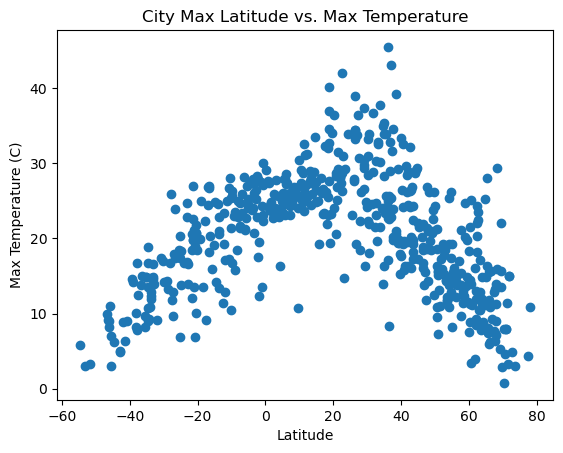

In [12]:
# Build scatter plot for latitude vs. temperature
cities_latitude = city_data_df["Lat"]
cities_max_temp = city_data_df["Max Temp"]

plt.scatter(cities_latitude, cities_max_temp)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

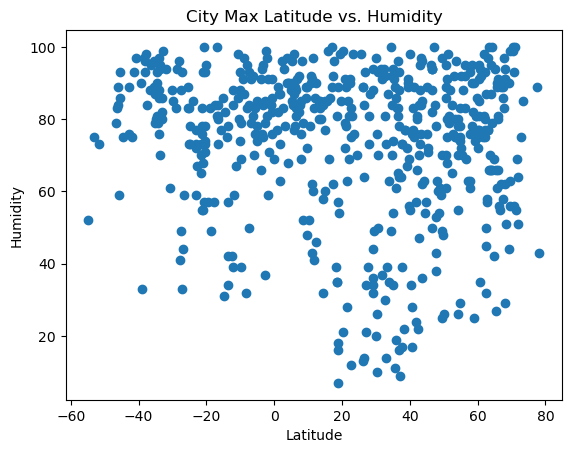

In [13]:
# Build the scatter plots for latitude vs. humidity
cities_humidity = city_data_df["Humidity"]

plt.scatter(cities_latitude, cities_humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

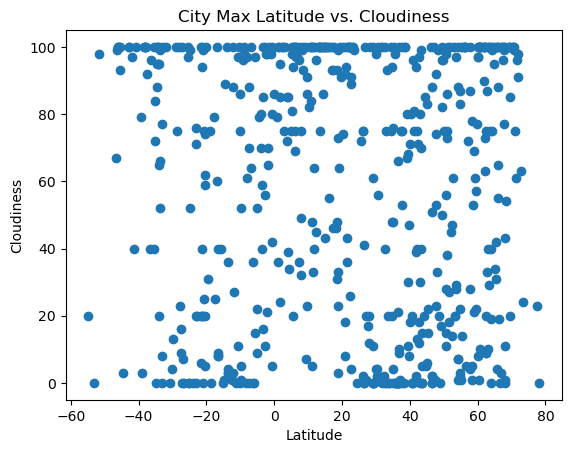

In [14]:
# Build the scatter plots for latitude vs. cloudiness
cities_cloudiness = city_data_df["Cloudiness"]

plt.scatter(cities_latitude, cities_cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

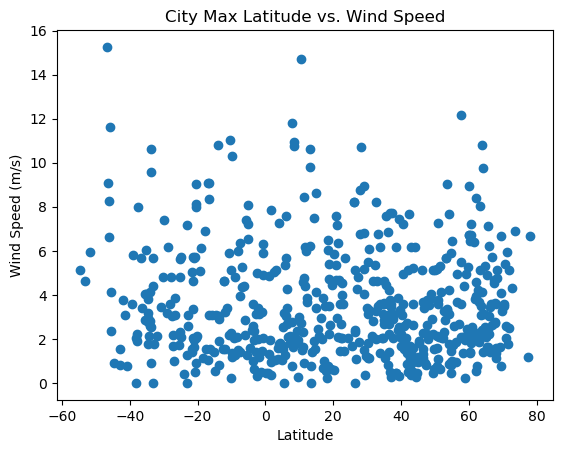

In [15]:
# Build the scatter plots for latitude vs. wind speed
cities_wind_speed = city_data_df["Wind Speed"]

plt.scatter(cities_latitude, cities_wind_speed)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def r_value():
    correlation = st.pearsonr(x_value, y_value)
    print(f"The r value is: {round(correlation[0],2)}")
    
def northern_linear_regression_plots():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(5.8,5.8),fontsize=15,color="red")
    
def southern_linear_regression_plots():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(-55.8,10.8),fontsize=15,color="red")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,silifke,36.3778,33.9344,25.61,83,0,4.23,TR,2023-07-03 21:58:44
2,leningradskiy,69.3833,178.4167,13.57,44,100,4.10,RU,2023-07-03 21:59:31
3,srednekolymsk,67.4500,153.6833,12.81,58,96,4.56,RU,2023-07-03 21:59:31
4,chokurdakh,70.6333,147.9167,4.67,56,99,5.41,RU,2023-07-03 21:59:31
5,butaritari,3.0707,172.7902,27.75,78,100,5.13,KI,2023-07-03 21:59:32


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,9.90,79,67,15.26,NZ,2023-07-03 21:59:31
6,cape town,-33.9258,18.4232,13.40,88,65,2.57,ZA,2023-07-03 21:57:27
13,rikitea,-23.1203,-134.9692,22.90,73,76,7.15,PF,2023-07-03 21:59:33
17,mataura,-46.1927,168.8643,8.22,89,100,6.62,NZ,2023-07-03 21:59:35
18,caravelas,-17.7125,-39.2481,22.36,57,79,6.89,BR,2023-07-03 21:59:35


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.67


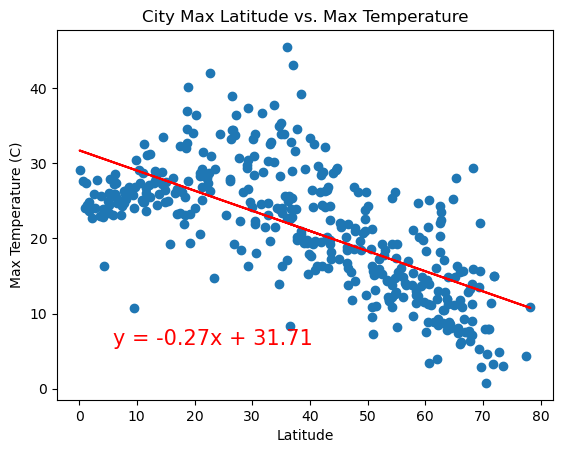

In [19]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

r_value()
northern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Max Temperature")

# Show the chart.
plt.show()

The r value is: 0.77


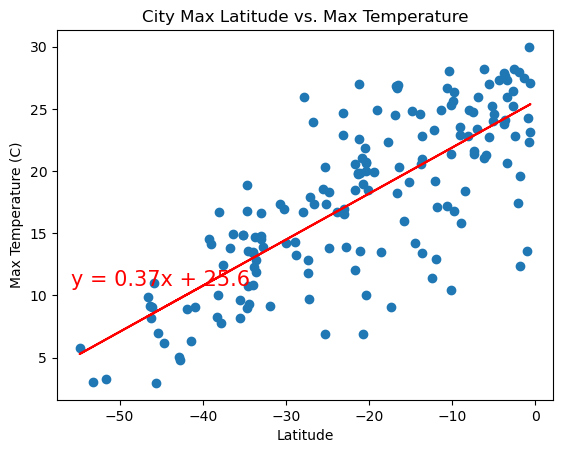

In [20]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

r_value()
southern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Max Temperature")

# Show the chart.
plt.show()

**Discussion about the linear relationship:**
In the Northern hemisphere, latitude and maximum temperature have a strong negative correlation with cities at higher latitudes, which are further from the equator, having noticeably colder temperatures.

In the Southern hemisphere we see a much weaker correlation between latitude and maximum temperature. The correlation is positive this time, but still shows us that cities that are further from the equator have generally lower temperatures

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.02


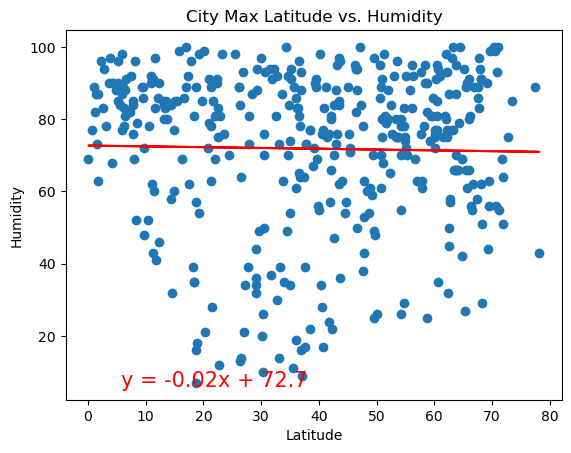

In [21]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

r_value()
northern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity")

# Show the chart.
plt.show()

The r value is: -0.09


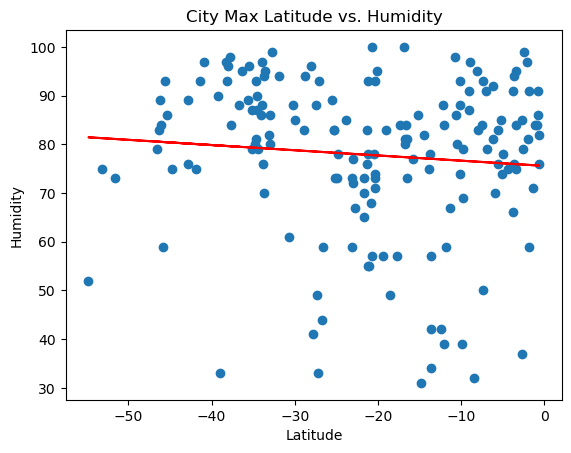

In [22]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

r_value()
southern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity")

# Show the chart.
plt.show()

**Discussion about the linear relationship:**
Both hemispheres show a weak positive correlation between city latitude and humidity, although it is slightly stronger in the Northern hemisphere.

There is a wide variation in city humidty at all latitudes in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.12


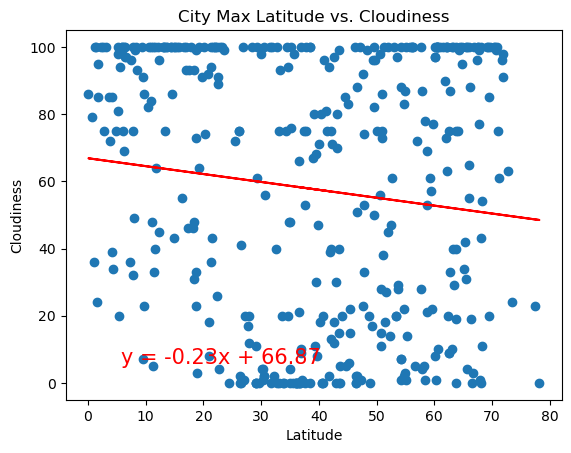

In [23]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]

r_value()
northern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness")

# Show the chart.
plt.show()

The r value is: -0.14


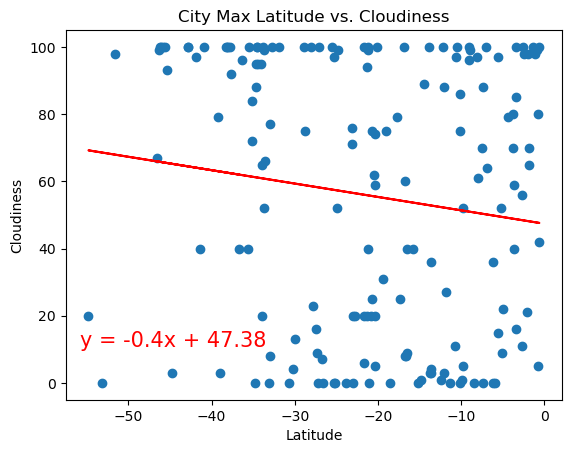

In [24]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]

r_value()
southern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness")

# Show the chart.
plt.show()

**Discussion about the linear relationship:** 
The correlation between city latitude and cloudiness is weakly positive in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.0


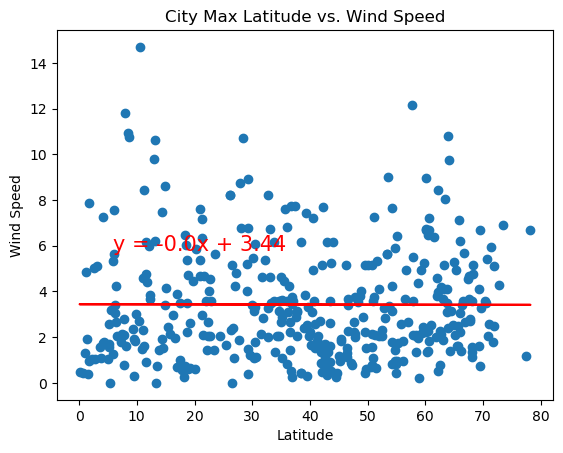

In [25]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

r_value()
northern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Max Latitude vs. Wind Speed")

# Show the chart.
plt.show()

The r value is: -0.15


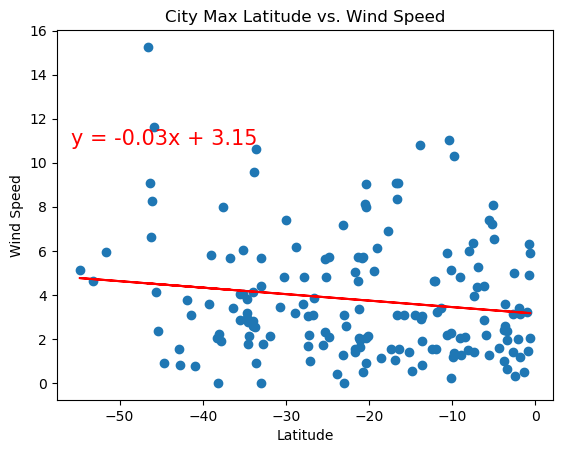

In [26]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]

r_value()
southern_linear_regression_plots()

plt.scatter(x_value, y_value)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Max Latitude vs. Wind Speed")

# Show the chart.
plt.show()

**Discussion about the linear relationship:** 
In the Northern hemisphere, the correlation between city latitude and wind speed is extremely weak, with almost no correlation at all. This shows there is a wide variety of Wind speeds at all Northern latitudes.

The correlation between city latitude and wind speed in the Southern hemisphere is also very weak, with a wide variety of wind speeds at each latitude.